# Spotify Hit Predictor: Data Analysis & Visualization

### 1. Project Setup: Importing Libraries

This notebook analyzes a dataset of Spotify tracks to uncover the key characteristics of a "hit" song. We begin by importing the necessary libraries for each stage of our data analysis pipeline.

*   **Data Manipulation:** `pandas` and `numpy` for data loading, cleaning, and transformation.
*   **Visualization:** `matplotlib`, `seaborn`, and `mcolors` for creating our custom, McKinsey-style charts.
*   **Data Processing & Stats:** `ast` for safe data parsing, `scipy.stats` for statistical testing, and `sklearn` for feature scaling.
*   **Notebook Utilities:** `IPython.display` for rendering styled tables.

In [ ]:
# Cell 1: Core Libraries and Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import ast
from scipy import stats
from sklearn.preprocessing import minmax_scale
from IPython.display import display

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [ ]:
# Cell 1c: McKinsey Style Configuration

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# --- 1. Core Visual Elements ---
MCKINSEY_COLORS = {
    "primary_blue": "#163E93",
    "secondary_blue": "#30A3DA",
    "accent_dark": "#051C2A",
    "white": "#FFFFFF",
    "text_gray": "#666666",
    "light_gray": "#F5F5F5",
    "success_green": "#00A651",
    "warning_orange": "#FF9500",
    "accent_teal": "#00A99D",
    "dark_gray": "#4D4D4D",
    "light_blue": "#A5C8E1"
}

MCKINSEY_FONTS = {
    "title": 16,
    "subtitle": 14,
    "label": 12,
    "tick": 10,
    "source": 9
}

MCKINSEY_PARAMS = {
    "figure_dpi": 100,
    "title_pad": 20,
    "label_pad": 15,
    "spine_width": 0.8,
    "grid_alpha": 0.3
}

# --- 2. Helper Functions for Styling ---
COLOR_SCHEMES = {
    "default": [MCKINSEY_COLORS["primary_blue"]],
    "sequential": [MCKINSEY_COLORS["light_blue"], MCKINSEY_COLORS["secondary_blue"], MCKINSEY_COLORS["primary_blue"]],
    "diverging": [MCKINSEY_COLORS["secondary_blue"], MCKINSEY_COLORS["white"], MCKINSEY_COLORS["primary_blue"]],
    "categorical": [MCKINSEY_COLORS["primary_blue"], MCKINSEY_COLORS["secondary_blue"],
                    MCKINSEY_COLORS["accent_teal"], MCKINSEY_COLORS["dark_gray"], MCKINSEY_COLORS["light_blue"]]
}

def apply_mckinsey_style(ax, remove_spines=True, remove_grid=True):
    """Apply standard McKinsey styling to matplotlib axes."""
    if remove_spines:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(MCKINSEY_PARAMS["spine_width"])
        ax.spines['bottom'].set_linewidth(MCKINSEY_PARAMS["spine_width"])
    if remove_grid:
        ax.grid(False)
    ax.set_facecolor(MCKINSEY_COLORS["white"])
    ax.tick_params(colors=MCKINSEY_COLORS["text_gray"])

def setup_chart_colors(chart_type="default", n_colors=1):
    """Return appropriate color schemes for different chart types."""
    colors = COLOR_SCHEMES.get(chart_type, COLOR_SCHEMES["default"])
    return colors[:n_colors] if n_colors <= len(colors) else colors

def add_source_label(fig, source_text="Source: Spotify API Data"):
    """Add a standardized source label to the figure."""
    fig.text(0.05, 0.02, source_text,
             fontsize=MCKINSEY_FONTS["source"],
             color=MCKINSEY_COLORS["text_gray"],
             ha='left')

# --- 3. Apply Global Styles ---
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'figure.dpi': MCKINSEY_PARAMS["figure_dpi"],
    'axes.titlepad': MCKINSEY_PARAMS["title_pad"],
    'axes.labelpad': MCKINSEY_PARAMS["label_pad"],
    'axes.titlesize': MCKINSEY_FONTS["title"],
    'axes.labelsize': MCKINSEY_FONTS["label"],
    'xtick.labelsize': MCKINSEY_FONTS["tick"],
    'ytick.labelsize': MCKINSEY_FONTS["tick"],
    'legend.fontsize': MCKINSEY_FONTS["label"],
    'figure.titlesize': MCKINSEY_FONTS["title"],
    'figure.titleweight': 'bold'
})

# --- 4. Confirmation Message ---
print("✅ McKinsey style configuration loaded.")
print(f"   - Available color schemes: {list(COLOR_SCHEMES.keys())}")

✅ McKinsey style configuration loaded.
   - Available color schemes: ['default', 'sequential', 'diverging', 'categorical']


In [ ]:
# Cell 2: Load Raw Data

# Load the datasets from the specified file paths.
df_tracks_raw = pd.read_csv('data/tracks.csv', low_memory=False)
df_artists_raw = pd.read_csv('data/artists.csv', low_memory=False)

# Display the shapes of the loaded dataframes.
print(f"Tracks dataset shape: {df_tracks_raw.shape}")
print(f"Artists dataset shape: {df_artists_raw.shape}")

Tracks dataset shape: (586672, 20)
Artists dataset shape: (1162095, 5)


In [ ]:
# Cell 3a: Display sample of tracks data
df_tracks_raw.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
# Cell 3b: Inspect tracks data types and missing values
df_tracks_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
# Cell 4a: Display sample of artists data
df_artists_raw.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
# Cell 4b: Inspect artists data types and missing values
df_artists_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162092 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [ ]:
# Cell 5: Helper Functions

import ast

# Safely evaluates a string containing a Python literal (e.g., a list).
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

# --- Confirmation Message ---
print("✅ Helper functions defined successfully.")

✅ Helper functions defined successfully.


In [ ]:
# Cell 6: Preprocess DataFrames

# A universal function to preprocess both tracks and artists dataframes.
def preprocess_dataframe(df, critical_fields, dataset_name, verbose=True):
    initial_rows = len(df)
    if verbose:
        print(f"--- Preprocessing {dataset_name} ({initial_rows:,} rows) ---")

    df_processed = df.copy()

    # 1. Handle missing values
    rows_before = len(df_processed)
    df_processed = df_processed.dropna(subset=critical_fields)
    if verbose:
        print(f"  - Removed {rows_before - len(df_processed):,} rows with missing critical info.")

    # 2. Dataset-specific transformations
    if dataset_name == 'tracks':
        df_processed['release_date'] = pd.to_datetime(df_processed['release_date'], errors='coerce')
        df_processed['explicit'] = df_processed['explicit'].astype(bool)
        df_processed['id_artists'] = df_processed['id_artists'].apply(safe_literal_eval)
        df_processed = df_processed[df_processed['id_artists'].str.len() > 0]

    elif dataset_name == 'artists':
        df_processed['genres'] = df_processed['genres'].apply(safe_literal_eval)
        df_processed['followers'] = pd.to_numeric(df_processed['followers'], errors='coerce')
        df_processed = df_processed.dropna(subset=['followers'])
        # --- FIX IS HERE ---
        # We are NO LONGER removing artists with empty genre lists at this stage.
        # df_processed = df_processed[df_processed['genres'].str.len() > 0]

    if verbose:
        print(f"✅ {dataset_name.title()} preprocessing complete. Final rows: {len(df_processed):,}")

    return df_processed

# --- Execute Preprocessing ---
df_tracks_processed = preprocess_dataframe(df_tracks_raw,
                                           critical_fields=['name', 'release_date', 'id_artists'],
                                           dataset_name='tracks')

df_artists_processed = preprocess_dataframe(df_artists_raw,
                                            critical_fields=['name', 'followers', 'genres'],
                                            dataset_name='artists')

--- Preprocessing tracks (586,672 rows) ---
  - Removed 71 rows with missing critical info.
✅ Tracks preprocessing complete. Final rows: 586,601
--- Preprocessing artists (1,162,095 rows) ---
  - Removed 14 rows with missing critical info.
✅ Artists preprocessing complete. Final rows: 1,162,081


In [ ]:
# Cell 7: Merge Tracks and Artists Data

# Merges tracks and artists, analyzes merge quality, and finalizes the dataset.
def merge_and_finalize(tracks_df, artists_df):

    # 1. Explode tracks by 'id_artists' to handle collaborations.
    df_tracks_exploded = tracks_df.explode('id_artists')

    # 2. Prepare artists data for merge.
    artists_renamed = artists_df.rename(columns={'id': 'id_artists'})

    # 3. Perform a left join with an indicator to track merge success.
    df_merged = pd.merge(
        df_tracks_exploded, artists_renamed,
        on='id_artists', how='left', indicator=True
    )

    # 4. Analyze and display merge quality.
    merge_summary = df_merged['_merge'].value_counts().reset_index()
    merge_summary.columns = ['Merge Status', 'Count']
    merge_summary['Percentage'] = (merge_summary['Count'] / len(df_merged) * 100).round(2)

    display(merge_summary.style
            .format({'Count': '{:,}', 'Percentage': '{:.2f}%'})
            .set_caption("Merge Quality Analysis")
            .hide(axis="index"))

    if 'left_only' in merge_summary['Merge Status'].values:
        unmatched_count = merge_summary[merge_summary['Merge Status'] == 'left_only']['Count'].iloc[0]
        print(f"⚠️ Warning: {unmatched_count:,} track-artist pairs could not be matched.")

    # 5. Finalize the dataset.
    df_final = df_merged[df_merged['_merge'] == 'both'].copy()
    df_final = df_final.drop(columns=['_merge'])

    column_mapping = {
        'name_x': 'track_name', 'popularity_x': 'track_popularity',
        'name_y': 'artist_name', 'popularity_y': 'artist_popularity'
    }
    df_final = df_final.rename(columns=column_mapping)

    print(f"\n✅ Merge complete. Final dataset has {df_final.shape[0]:,} rows.")
    return df_final

# --- Execute Merge Pipeline ---
df_merged_exploded = merge_and_finalize(df_tracks_processed, df_artists_processed)

Merge Status,Count,Percentage
both,"730,944",96.55%
left_only,"26,155",3.45%
right_only,0,0.00%


⚠️ Warning: 26,155 track-artist pairs could not be matched.

✅ Merge complete. Final dataset has 730,944 rows.


### Understanding the Merge Logic and Row Count

The table above shows the result of merging our `tracks` and `artists` datasets. It's important to understand why the final row count (`730,944`) is different from our initial number of tracks (`586,601`).

This is due to a key data transformation step: **`explode`**.

1.  **Initial State:** We start with `586,601` unique tracks. Many of these tracks are collaborations, where the `id_artists` column contains a list of multiple artist IDs (e.g., `['artist_A', 'artist_B']`).

2.  **The `explode` Operation:** Before merging, we apply the `.explode('id_artists')` method. This operation takes each track with multiple artists and creates a separate row for each artist.
    *   A solo track remains as **1** row.
    *   A track with two artists becomes **2** rows.
    *   A track with three artists becomes **3** rows, and so on.

3.  **Final Result:** This "explosion" of collaborations is why the number of rows increases from `586,601` to `757,099` (the total number of track-artist pairs before filtering out unmatched records). The final dataset of `730,944` rows represents every individual artist's contribution to every track in our dataset.

This "long" format is essential for our analysis, as it allows us to correctly account for the influence of every artist on a track's success.

In [ ]:
# Cell 8: Quality Check (Post-Merge)

if 'df_merged_exploded' in locals():

    # 1. Gather key metrics into a dictionary.
    metrics = {
        "Total Rows (Track-Artist Pairs)": f"{len(df_merged_exploded):,}",
        "Unique Tracks": f"{df_merged_exploded['id'].nunique():,}",
        "Unique Artists": f"{df_merged_exploded['id_artists'].nunique():,}",
        "Date Range": (f"{df_merged_exploded['release_date'].min():%Y-%m-%d} to "
                       f"{df_merged_exploded['release_date'].max():%Y-%m-%d}"),
        "Average Artists per Track": f"{(len(df_merged_exploded) / df_merged_exploded['id'].nunique()):.2f}",
        "Total Missing Values": df_merged_exploded.isnull().sum().sum()
    }

    # 2. Create and display the styled report.
    report_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

    display(report_df.style
            .set_caption("Merged Dataset Quality Report")
            .hide(axis="index")
            .set_properties(**{'text-align': 'left'}))

    # 3. Print a final status check.
    if metrics["Total Missing Values"] == 0:
        print("\n✅ Validation Passed: No missing values found.")
    else:
        print(f"\n⚠️ Validation Warning: Found {metrics['Total Missing Values']} missing values.")

else:
    print("❌ Merged data not found.")

Metric,Value
Total Rows (Track-Artist Pairs),"730,944"
Unique Tracks,"576,126"
Unique Artists,"81,775"
Date Range,1900-01-01 to 2021-04-16
Average Artists per Track,1.27
Total Missing Values,184725



⚠️ Validation Warning: Found 184725 missing values.


### Understanding the Missing Values

The validation report above flags over 184,000 missing values. This is not an error, but an expected outcome of our merge strategy.

*   **Origin of NaNs:** These missing values appear in the columns that came from the `artists` dataset (e.g., `artist_name`, `followers`, `genres`).
*   **Reason:** They correspond to the `26,155` track-artist pairs that were flagged as `left_only` during the merge in **Cell 7**. For these pairs, we have track information but could not find a matching artist in our artists dataset.

**Next Step:** These rows with missing artist information are not useful for our analysis. They will be naturally removed in a later step when we create our final `df_master` dataset, which is built using an `inner` join that only keeps fully matched records.

In [ ]:
# Cell 9a: Popularity Distribution Analysis

if 'df_merged_exploded' in locals():

    # Create popularity bins (e.g., 0-9, 10-19, ...)
    bins = range(0, 101, 10)
    labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
    df_merged_exploded['popularity_bin'] = pd.cut(
        df_merged_exploded['track_popularity'],
        bins=bins, labels=labels,
        right=False, include_lowest=True
    )

    # Generate summary statistics
    bin_counts = df_merged_exploded['popularity_bin'].value_counts().sort_index()
    summary_df = pd.DataFrame({
        'Count': bin_counts,
        'Proportion (%)': df_merged_exploded['popularity_bin'].value_counts(normalize=True).sort_index() * 100
    })
    summary_df['Cumulative (%)'] = summary_df['Proportion (%)'].cumsum()

    # Display a clean, formatted summary table
    display(summary_df.style
            .format({'Count': '{:,}', 'Proportion (%)': '{:.2f}%', 'Cumulative (%)': '{:.2f}%'})
            .set_caption("Track Popularity Distribution"))

    print("\n✅ 'popularity_bin' column added to the dataset.")
else:
    print("❌ Merged data not found.")

,Count,Proportion (%),Cumulative (%)
popularity_bin,,,
0-9,"173,847",23.78%,23.78%
10-19,"106,685",14.60%,38.38%
20-29,"128,989",17.65%,56.03%
30-39,"124,739",17.07%,73.09%
40-49,"96,955",13.26%,86.36%
50-59,"60,853",8.33%,94.68%
60-69,"28,248",3.86%,98.55%
70-79,"9,193",1.26%,99.80%
80-89,"1,358",0.19%,99.99%



✅ 'popularity_bin' column added to the dataset.


### Interpreting the Popularity Distribution

The table above shows that the vast majority of tracks have a low popularity score. The **'Cumulative (%)'** column is particularly insightful: it shows the percentage of tracks that fall at or below a certain popularity level. For example, we can quickly see what percentage of songs have a popularity score below 40, which represents the "long tail" of the music market. This binning is the foundation for our `hit_tier` classification.

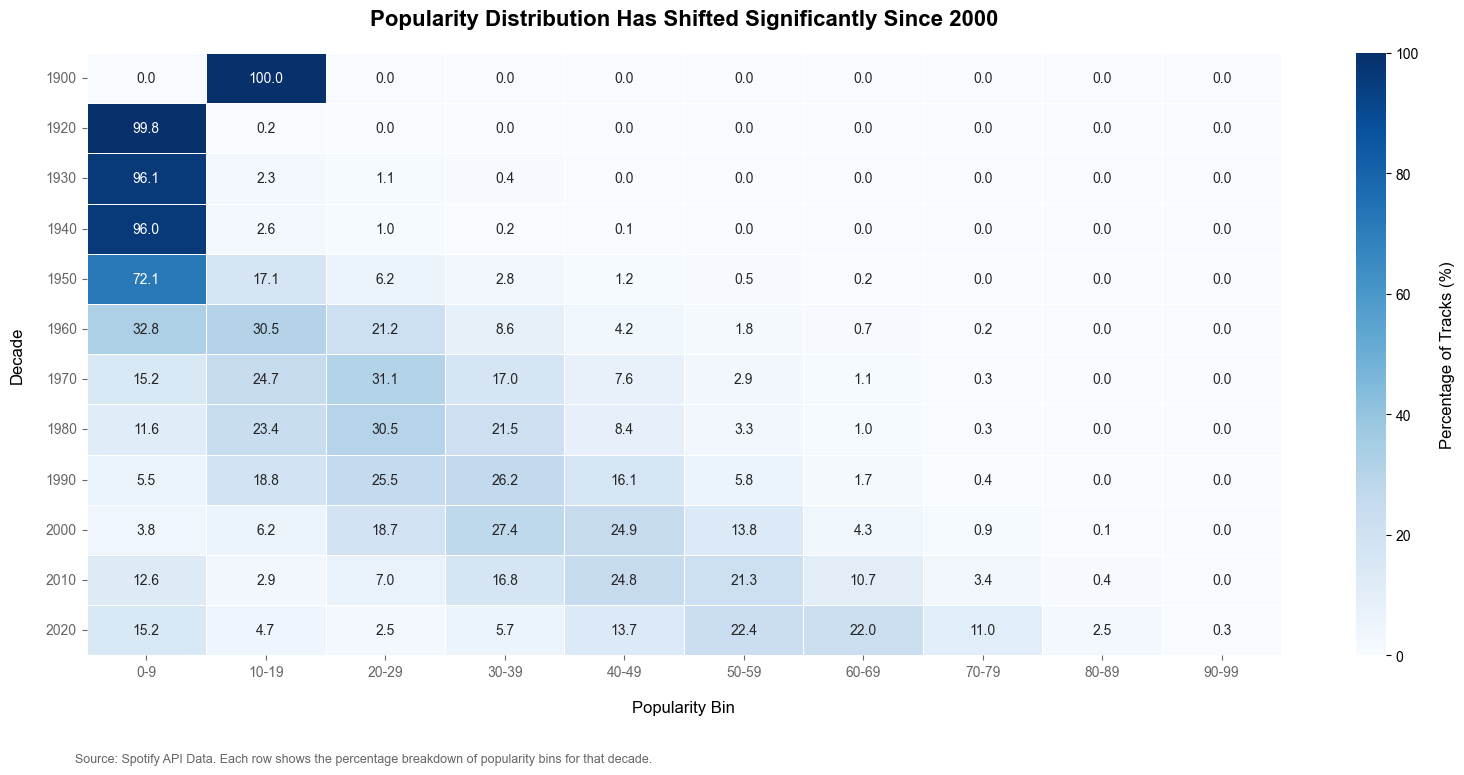

In [ ]:
# Cell 10: Decade vs Popularity Analysis (Heatmap)

if 'df_merged_exploded' in locals():

    # --- 1. Data Preparation ---
    # Create a 'decade' column.
    df_merged_exploded['decade'] = (df_merged_exploded['release_date'].dt.year // 10) * 10

    # Create a crosstab normalized by decade.
    temporal_summary = pd.crosstab(
        index=df_merged_exploded['decade'],
        columns=df_merged_exploded['popularity_bin'],
        normalize='index'
    ) * 100

    # FIX: Convert the float index (e.g., 1990.0) to a clean integer (e.g., 1990).
    temporal_summary.index = temporal_summary.index.astype(int)

    # --- 2. Visualization: Heatmap ---
    fig, ax = plt.subplots(figsize=(16, 8))

    sns.heatmap(
        temporal_summary,
        ax=ax,
        cmap='Blues',
        annot=True,       # Show the percentage values in the cells
        fmt=".1f",        # Format values to one decimal place
        linewidths=.5,
        cbar_kws={'label': 'Percentage of Tracks (%)'} # Label for the color bar
    )

    apply_mckinsey_style(ax, remove_spines=False) # Keep spines for heatmap structure

    # --- 3. Styling and Labels ---
    ax.set_title("Popularity Distribution Has Shifted Significantly Since 2000", fontsize=MCKINSEY_FONTS['title'], fontweight='bold', pad=20)
    ax.set_xlabel("Popularity Bin")
    ax.set_ylabel("Decade")
    ax.tick_params(axis='y', rotation=0) # Ensure decade labels are horizontal

    source_text = "Source: Spotify API Data. Each row shows the percentage breakdown of popularity bins for that decade."
    fig.text(0.05, -0.01, source_text, fontsize=MCKINSEY_FONTS['source'], color=MCKINSEY_COLORS['text_gray'], ha='left')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("❌ Merged data not found. Please run the previous cells first.")

### Rationale for Temporal Filtering (2000-Present)

The heatmap in the previous cell clearly shows a structural shift in popularity distribution around the year 2000. Pre-2000s tracks are heavily skewed towards low popularity, likely due to data biases.

To ensure our analysis focuses on the patterns of the modern music industry, we will filter the dataset to include **only tracks released in 2000 or later.**

In [ ]:
# Cell 11: Apply Temporal Filter

FILTER_YEAR = 2000
initial_rows = len(df_merged_exploded)

# Apply the filter directly
df_modern_exploded = df_merged_exploded[
    df_merged_exploded['release_date'].dt.year >= FILTER_YEAR
].copy()

# Report the result concisely
final_rows = len(df_modern_exploded)
retention_pct = (final_rows / initial_rows) * 100

print(f"✅ Temporal filter applied (>= {FILTER_YEAR}).")
print(f"   - Kept {final_rows:,} of {initial_rows:,} rows ({retention_pct:.1f}%).")

✅ Temporal filter applied (>= 2000).
   - Kept 241,708 of 730,944 rows (33.1%).


In [ ]:
# Cell 12: Create Aggregated Artist Features

# Aggregates artist-level information for each unique track using named aggregations.
df_artist_features = df_modern_exploded.groupby('id').agg(
    artist_names_list=('artist_name', list),
    followers_max=('followers', 'max'),
    followers_mean=('followers', 'mean'),
    artist_popularity_mean=('artist_popularity', 'mean'),
    num_artists=('id_artists', 'count'),
    all_genres=('genres', lambda x: sorted(list(set(g for genres_list in x for g in genres_list))))
).reset_index()

print(f"✅ Aggregated artist features created for {len(df_artist_features):,} unique tracks.")

# Display a sample of the new DataFrame
df_artist_features.head(3)

✅ Aggregated artist features created for 188,662 unique tracks.


,id,artist_names_list,followers_max,followers_mean,artist_popularity_mean,num_artists,all_genres
0,0004Uy71ku11n3LMpuyf59,[Golden Life],5425.0,5425.0,36.0,1,[polish rock]
1,000CSYu4rvd8cQ7JilfxhZ,[Kaïn],30176.0,30176.0,48.0,1,"[country quebecois, rock quebecois]"
2,000KblXP5csWFFFsD6smOy,[Tamara Castro],26380.0,26380.0,44.0,1,"[chamame, folclore salteno, folklore argentino]"


In [ ]:
# Cell 13: Create Master Dataset

# 1. Select only the non-artist-specific columns from the original track data.
# We take the first row for each track ID to get unique track info.
track_info_cols = [
    'id', 'track_name', 'track_popularity', 'duration_ms', 'explicit',
    'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature', 'popularity_bin', 'decade'
]
# Ensure we only select columns that actually exist
existing_track_cols = [col for col in track_info_cols if col in df_modern_exploded.columns]
df_unique_tracks = df_modern_exploded[existing_track_cols].drop_duplicates(subset=['id'])

# 2. Merge with the aggregated artist features.
df_master = pd.merge(df_unique_tracks, df_artist_features, on='id', how='inner')

# 3. Final validation and confirmation.
is_valid = len(df_master) == df_master['id'].nunique()
validation_status = "✅ Valid" if is_valid else "❌ Invalid (duplicates found)"

print(f"Master dataset created: {df_master.shape[0]:,} unique tracks.")
print(f" -> Uniqueness validation: {validation_status}")

Master dataset created: 188,662 unique tracks.
 -> Uniqueness validation: ✅ Valid


In [ ]:
# Cell 14: Analysis Configuration

# Central configuration dictionary for all analysis parameters and feature lists.
CONFIG = {
    # Feature Lists
    'audio_features_continuous': [
        'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
    ],
    'audio_features_discrete': ['key', 'mode', 'time_signature'],
    'artist_features': [
        'num_artists', 'followers_max',
        'followers_mean', 'artist_popularity_mean'
    ],

    # Classification Parameters
    'hit_tier_config': {
        'bins': [0, 40, 60, 80, 101],
        'labels': ['Long Tail', 'Mid-Tier', 'Solid Hit', 'Super Hit']
    },

    # Mapping for Temporal Features
    'seasonal_mapping': {
        'Winter': [12, 1, 2], 'Spring': [3, 4, 5],
        'Summer': [6, 7, 8], 'Autumn': [9, 10, 11]
    }
}

print("✅ Analysis configuration loaded into a single CONFIG dictionary.")

✅ Analysis configuration loaded into a single CONFIG dictionary.


In [ ]:
# Cell 15: Feature Engineering

# A single pipeline function to create all new analytical features using the CONFIG dictionary.
def engineer_features(df, config):
    df_eng = df.copy()

    # 1. Create Hit Tier Classification
    df_eng['hit_tier'] = pd.cut(
        df_eng['track_popularity'],
        bins=config['hit_tier_config']['bins'],
        labels=config['hit_tier_config']['labels'],
        right=False,
        include_lowest=True
    )

    # 2. Create Temporal Features
    df_eng['release_month'] = df_eng['release_date'].dt.month
    month_to_season = {month: season for season, months in config['seasonal_mapping'].items() for month in months}
    df_eng['season'] = df_eng['release_month'].map(month_to_season)

    # 3. Create Collaboration Feature
    df_eng['is_collaboration'] = df_eng['num_artists'] > 1

    # 4. Create Integral Audio Indices
    df_scaled = pd.DataFrame(minmax_scale(df_eng[config['audio_features_continuous']]),
                             columns=config['audio_features_continuous'],
                             index=df_eng.index)
    df_eng['index_positive_energy'] = df_scaled[['danceability', 'energy', 'valence']].mean(axis=1)
    df_eng['index_acoustic_focus'] = df_scaled[['acousticness', 'speechiness']].mean(axis=1)

    return df_eng

# --- Execute Feature Engineering Pipeline ---
df_master = engineer_features(df_master, CONFIG)

print("✅ Feature engineering complete. New analytical columns added.")

# Display a sample of the key new features
display_cols = ['hit_tier', 'season', 'is_collaboration', 'index_positive_energy']
df_master[display_cols].head()

✅ Feature engineering complete. New analytical columns added.


,hit_tier,season,is_collaboration,index_positive_energy
0,Mid-Tier,Winter,False,0.346132
1,Mid-Tier,Winter,False,0.453893
2,Long Tail,Winter,False,0.437111
3,Long Tail,Spring,False,0.253966
4,Long Tail,Spring,False,0.186814


### Newly Engineered Features

To move from raw data to actionable insights, we have engineered several new features. These columns translate raw numbers into analytical concepts that directly address our business questions:

*   **`hit_tier` (Categorical):** Converts the continuous `track_popularity` score (0-100) into four distinct, understandable categories: `Long Tail`, `Mid-Tier`, `Solid Hit`, and `Super Hit`. This is the primary target variable for our analysis.

*   **`season` (Categorical):** Groups the `release_date` into four seasons (`Winter`, `Spring`, `Summer`, `Autumn`) to help us identify potential seasonal trends in music releases.

*   **`is_collaboration` (Boolean):** A simple but powerful flag (`True`/`False`) that indicates whether a track is a collaboration (`num_artists` > 1). This allows us to directly compare the performance of solo tracks versus collaborations.

*   **`index_...` (Numeric):** These are composite scores that represent high-level sonic concepts. For example, `index_positive_energy` combines `danceability`, `energy`, and `valence` into a single metric, allowing us to analyze the overall "mood" of a track rather than just its individual components.

In [ ]:
# Cell 16: Final Validation and Automated Fix

if 'df_master' in locals():
    print("--- Running Final Data Validation ---")

    # --- 1. Check for Missing Values (and fix if necessary) ---
    missing_count = df_master.isnull().sum().sum()
    if missing_count > 0:
        print(f"⚠️ Found {missing_count} missing value(s). Diagnosing and fixing...")
        missing_info = df_master.isnull().sum()
        columns_with_nan = missing_info[missing_info > 0]
        print("Missing values were in column(s):")
        display(pd.DataFrame(columns_with_nan, columns=['Missing Count']))

        rows_before = len(df_master)
        df_master = df_master.dropna()
        print(f"✅ Removed {rows_before - len(df_master)} row(s).")

    # --- 2. Perform All Other Validation Checks using CONFIG ---
    all_features_to_check = CONFIG['audio_features_continuous'] + CONFIG['artist_features']
    checks = {
        "Data Completeness": df_master.isnull().sum().sum() == 0,
        "Track Uniqueness": df_master['id'].nunique() == len(df_master),
        "Required Features": all(f in df_master.columns for f in all_features_to_check),
        "Hit Tier Balance": df_master['hit_tier'].value_counts().min() >= 30
    }

    # --- 3. Create and Display Final Report ---
    report_data = [[check, "✅ PASS" if status else "❌ FAIL"] for check, status in checks.items()]
    report_df = pd.DataFrame(report_data, columns=["Check", "Status"])

    # FIX: Using the modern .map() instead of the deprecated .applymap()
    display(report_df.style
            .map(lambda status: "color: red; font-weight: bold;" if "❌" in status else "color: green;", subset=['Status'])
            .set_properties(**{'text-align': 'left'})
            .hide(axis="index")
            .set_caption("Final Analysis Readiness Report"))

    if all(checks.values()):
        print("\n✅ Dataset is validated and ready for analysis.")
    else:
        print("\n❌ ISSUES DETECTED: Please review the report.")

else:
    print("❌ Master data not found.")

--- Running Final Data Validation ---


Check,Status
Data Completeness,✅ PASS
Track Uniqueness,✅ PASS
Required Features,✅ PASS
Hit Tier Balance,✅ PASS



✅ Dataset is validated and ready for analysis.


## 2. The Anatomy of a Hit: Statistical Analysis

Now that our data is clean and enriched, we can begin to answer our core question: **What makes a song a hit?**

We will start by analyzing the fundamental audio characteristics of tracks. Our approach has two steps:
1.  **Observation:** We'll first look at the *average* audio profile for each `hit_tier` to spot any visible trends.
2.  **Validation:** We'll then use a statistical test (Kruskal-Wallis) to confirm whether these trends are statistically significant or just random chance.

In [ ]:
# Cell 17b: Descriptive Statistics

# Calculate the mean of continuous audio features for each hit tier.
# We use CONFIG for feature lists and observed=True to align with modern pandas.
audio_feature_means = df_master.groupby('hit_tier', observed=True)[CONFIG['audio_features_continuous']].mean()

# Display the results in a clean, formatted table.
display(audio_feature_means.style
        .format("{:.2f}")
        .set_caption("Mean Values of Continuous Audio Features by Hit Tier"))

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
hit_tier,,,,,,,,,
Long Tail,0.59,0.66,-7.69,0.09,0.30,0.10,0.22,0.54,122.15
Mid-Tier,0.62,0.65,-7.11,0.09,0.30,0.04,0.20,0.54,121.48
Solid Hit,0.64,0.65,-6.68,0.10,0.27,0.04,0.18,0.51,121.78
Super Hit,0.68,0.64,-6.19,0.11,0.24,0.01,0.17,0.51,121.28


In [ ]:
# Cell 17c: Statistical Significance Test

# Perform the Kruskal-Wallis H-test for each audio feature.
test_results = []
all_audio_features = CONFIG['audio_features_continuous'] + CONFIG['audio_features_discrete']

for feature in all_audio_features:
    groups = [df_master[feature][df_master['hit_tier'] == tier].dropna() for tier in CONFIG['hit_tier_config']['labels']]

    if len(groups) >= 2:
        h_stat, p_val = stats.kruskal(*groups)
        test_results.append({
            'Feature': feature,
            'H-Statistic': h_stat,
            'p-value': p_val,
            'Significant (p < 0.05)': 'Yes' if p_val < 0.05 else 'No'
        })

# Create and display the styled results DataFrame.
significance_results = pd.DataFrame(test_results).sort_values('p-value')

display(significance_results.style
        .format({'H-Statistic': '{:.2f}', 'p-value': '{:.4g}'})
        .set_caption("Statistical Significance of Differences Across Hit Tiers")
        .hide(axis="index"))

Feature,H-Statistic,p-value,Significant (p < 0.05)
danceability,2460.83,0,Yes
loudness,2391.34,0,Yes
speechiness,1481.14,0,Yes
instrumentalness,2986.82,0,Yes
liveness,576.76,1.101e-124,Yes
energy,330.70,2.255e-71,Yes
acousticness,325.62,2.832e-70,Yes
valence,166.82,6.19e-36,Yes
time_signature,83.69,4.948e-18,Yes
tempo,64.19,7.467e-14,Yes


### Interpretation: The Sonic Fingerprint of a Hit

The two tables above work together to tell a clear story:

1.  **The "What" (Mean Values):** The first table reveals the average audio profile for each tier. A distinct pattern emerges: as tracks climb towards 'Super Hit' status, they consistently become **more danceable** and **louder**, while being significantly **less instrumental** and **less acoustic**.

2.  **The "So What" (Significance Test):** The second table proves that these observed differences are not a coincidence. The extremely low `p-value` for most features confirms they are **statistically significant**. The only characteristic that appears to have no statistical relationship with a song's success is its musical `key`.

**Overall Conclusion:** A hit song has a measurable sonic fingerprint. While there's no single magic formula, features like `danceability`, `loudness`, and `instrumentalness` are powerful, statistically proven differentiators between an average track and a major hit.

### Visualizing the Differences in Audio Features

The statistical tests confirmed *that* significant differences exist between hit tiers. Now, we need to understand *what these differences look like*.

Averages can sometimes be misleading. By visualizing the full distribution of each feature with a **violin plot**, we can see not only the change in the median (the central line) but also the change in the **shape and spread** of the data. This will give us a much richer understanding of the sonic profile of a hit. We will focus on the top 4 most statistically significant features identified in the previous step.

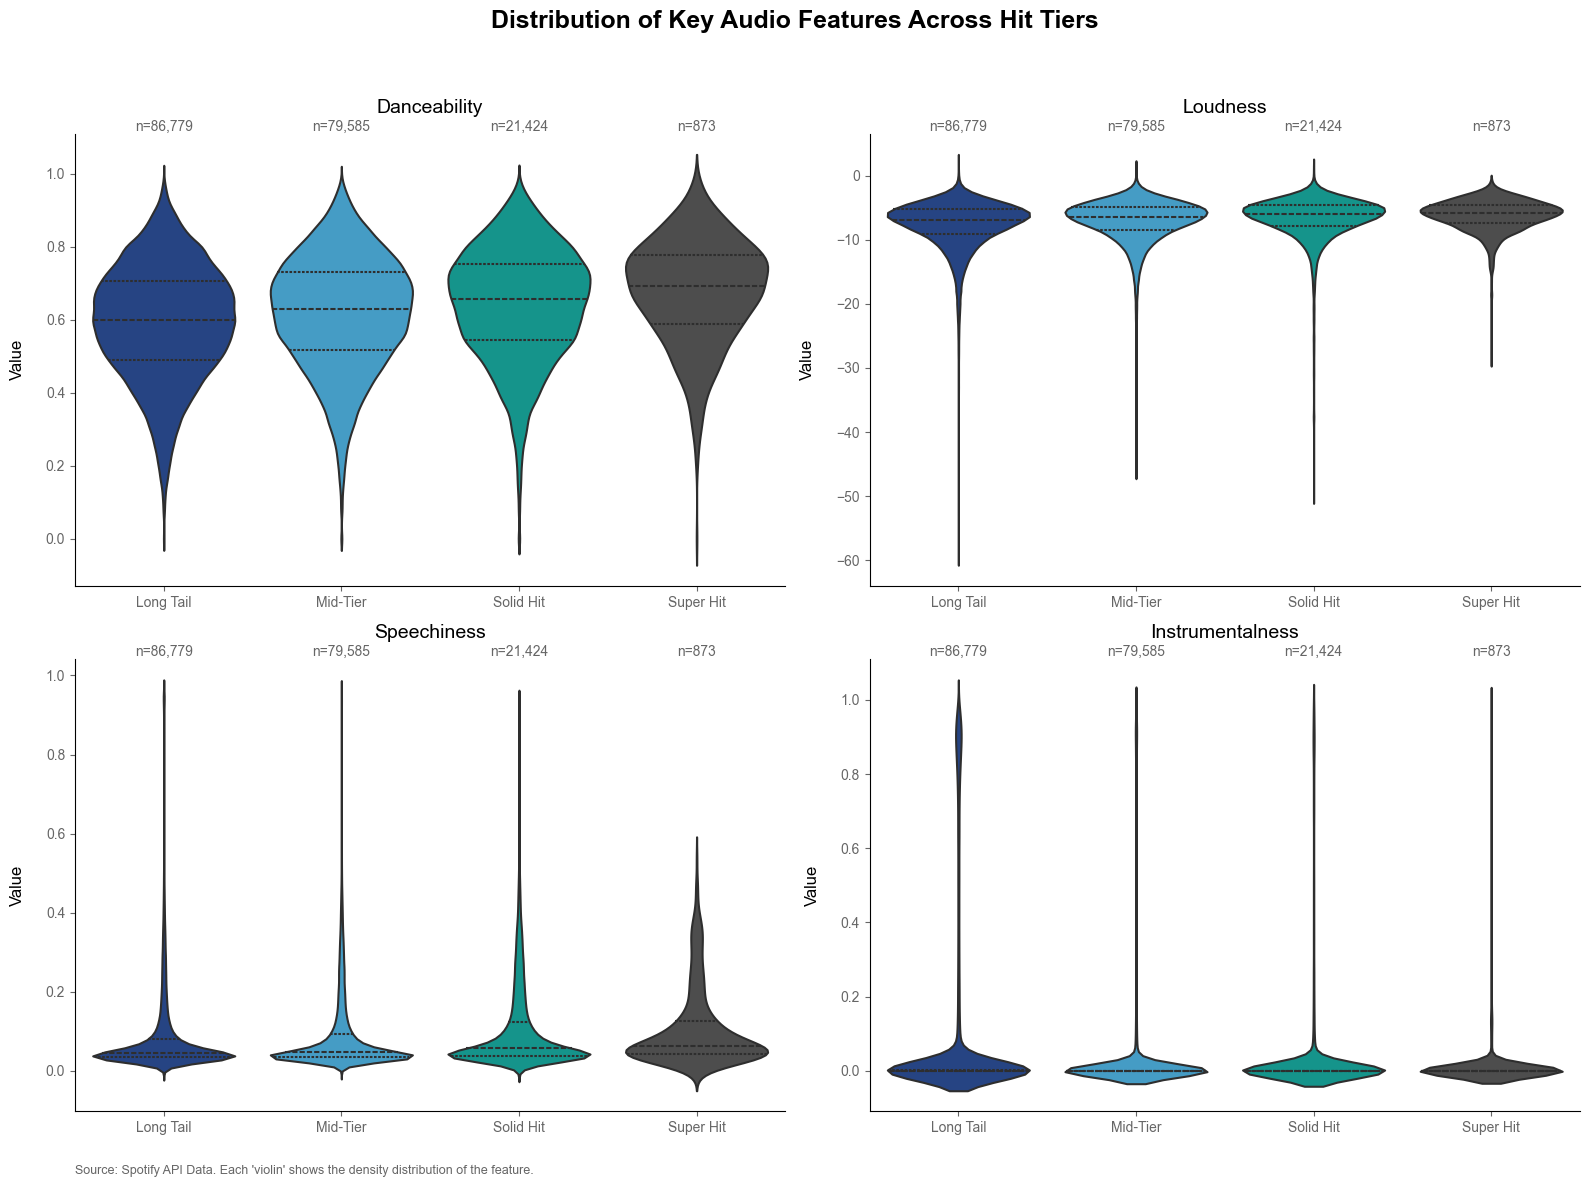

In [ ]:
# Cell 18b: Audio Features Visualization

# Creates a grid of violin plots to visualize feature distributions.
def plot_audio_feature_distributions(df, features, config):

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    fig.suptitle("Distribution of Key Audio Features Across Hit Tiers", fontsize=config['fonts']['title'] + 2, fontweight='bold', y=0.98)

    tier_labels = config['hit_tier_config']['labels']
    sample_sizes = df['hit_tier'].value_counts()
    colors = setup_chart_colors("categorical", n_colors=len(tier_labels))

    for i, feature in enumerate(features):
        ax = axes[i]

        sns.violinplot(data=df, x='hit_tier', y=feature, ax=ax,
                       order=tier_labels,
                       palette=colors,
                       hue='hit_tier',
                       legend=False,
                       inner='quart',
                       linewidth=1.5)

        apply_mckinsey_style(ax)

        ax.set_title(feature.replace('_', ' ').title(), fontsize=config['fonts']['subtitle'], pad=15)
        ax.set_xlabel("")
        ax.set_ylabel("Value")

        y_pos = ax.get_ylim()[1]
        for xtick in ax.get_xticks():
            ax.text(xtick, y_pos, f"n={sample_sizes[tier_labels[xtick]]:,}",
                    ha='center', va='bottom', fontsize=config['fonts']['tick'], color=config['colors']['text_gray'])

    source_text = "Source: Spotify API Data. Each 'violin' shows the density distribution of the feature."
    fig.text(0.05, 0.01, source_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'], ha='left')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Execute Visualization ---
# Select the top 4 most significant features from the previous analysis.
TOP_FEATURES = significance_results['Feature'].head(4).tolist()

# We need to update our CONFIG to include the full McKinsey style dictionaries
CONFIG['colors'] = MCKINSEY_COLORS
CONFIG['fonts'] = MCKINSEY_FONTS

plot_audio_feature_distributions(df_master, TOP_FEATURES, CONFIG)

### Understanding Inter-Feature Relationships (Correlation)

Our analysis so far has focused on how individual features relate to *popularity*. However, it's also crucial to understand how these audio features relate to *each other*. This helps us identify potential redundancies and uncover deeper patterns in song production.

For this, we will visualize the **Spearman rank correlation** matrix. We chose Spearman over the more common Pearson method because it is more robust to outliers and can capture non-linear relationships, providing a more reliable overview of feature interactions.

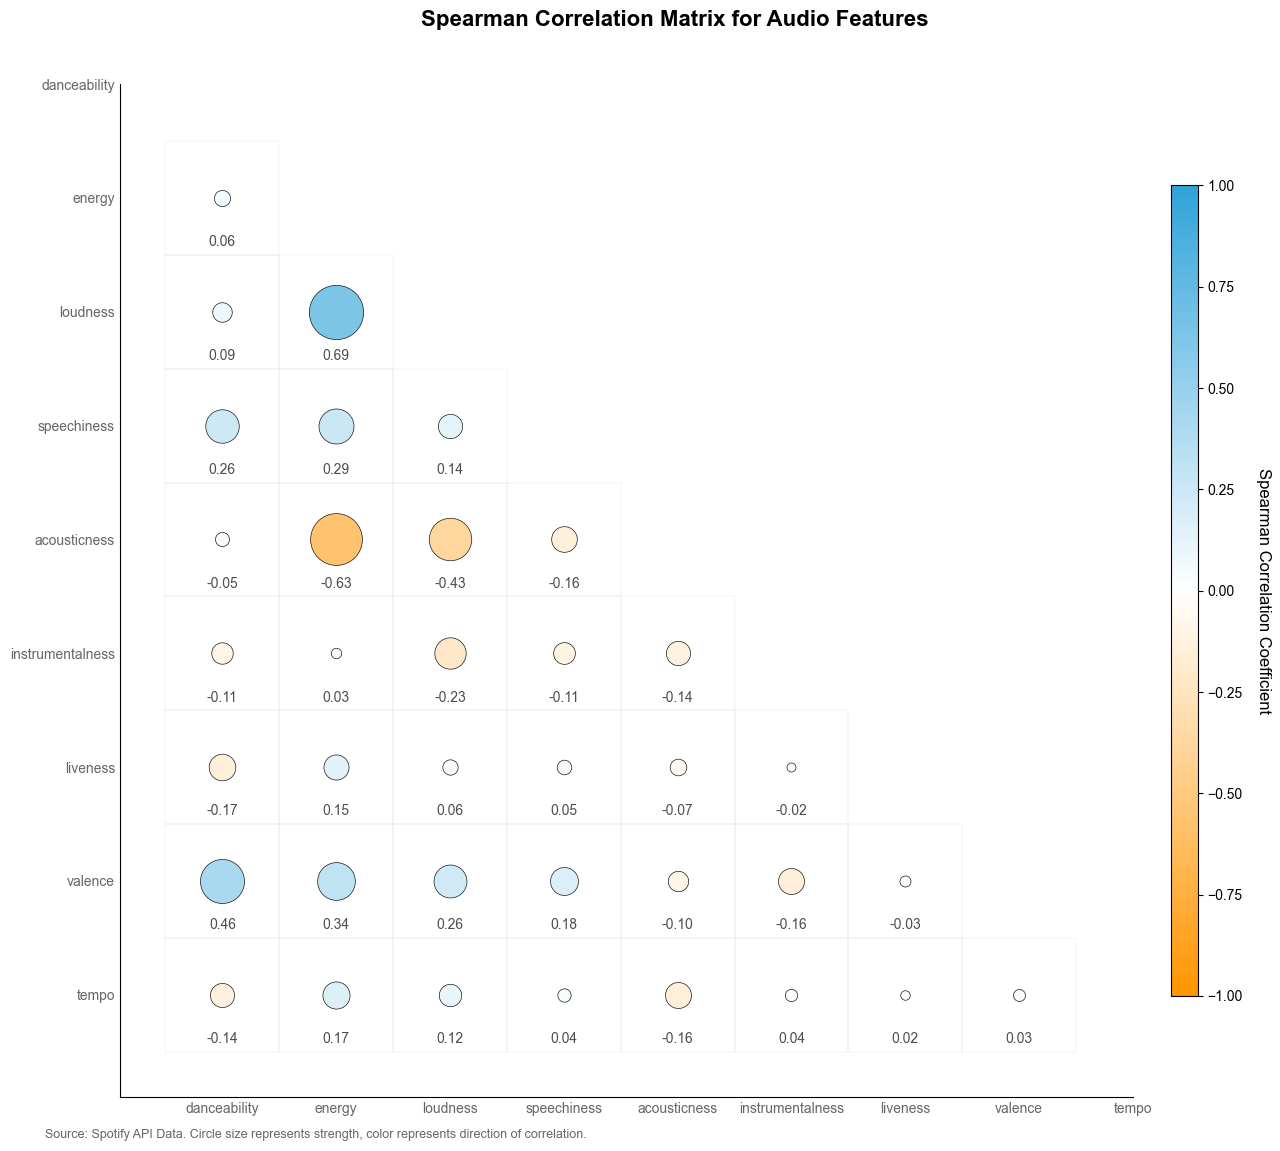

In [ ]:
# Cell 19b: Correlation Analysis (Spearman)

# Creates a highly polished, McKinsey-style correlation visualization.
def plot_correlation_matrix(corr_matrix, title="", config=CONFIG):
    fig, ax = plt.subplots(figsize=(14, 12))
    apply_mckinsey_style(ax)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    cmap = mcolors.LinearSegmentedColormap.from_list("mckinsey_corr_diverging",
        [config['colors']["warning_orange"], config['colors']["white"], config['colors']["secondary_blue"]])
    norm = mcolors.Normalize(vmin=-1, vmax=1)

    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            if not mask[i, j]:
                square = plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, edgecolor='lightgrey', linewidth=0.3, alpha=0.6)
                ax.add_patch(square)
                if i != j:
                    coef = corr_matrix.iloc[i, j]
                    size = np.abs(coef) * 2200
                    color = cmap(norm(coef))
                    ax.scatter(j, i, s=size, color=color, edgecolors='black', linewidths=0.5, alpha=0.9)
                    ax.text(j, i + 0.45, f'{coef:.2f}', color=config['colors']['dark_gray'], ha='center', va='bottom', fontsize=config['fonts']['tick'])

    ax.set_xticks(range(len(corr_matrix.columns)))
    ax.set_yticks(range(len(corr_matrix.columns)))
    ax.set_xticklabels(corr_matrix.columns, rotation=0, ha='center')
    ax.set_yticklabels(corr_matrix.index)
    ax.tick_params(axis='both', which='both', length=0)
    ax.invert_yaxis()
    ax.set_aspect('equal')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.8, aspect=30, pad=0.03)
    cbar.set_label('Spearman Correlation Coefficient', rotation=270, labelpad=20, fontsize=config['fonts']['label'])
    cbar.ax.tick_params(labelsize=config['fonts']['tick'])

    fig.suptitle(title, fontsize=config['fonts']['title'], fontweight='bold', y=0.97)
    source_text = "Source: Spotify API Data. Circle size represents strength, color represents direction of correlation."
    fig.text(0.05, 0.03, source_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'], ha='left')
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# --- Execute Analysis ---
# Calculate Spearman correlation matrix using features from CONFIG
spearman_corr_matrix = df_master[CONFIG['audio_features_continuous']].corr(method='spearman')

# Plot the matrix
plot_correlation_matrix(spearman_corr_matrix, title="Spearman Correlation Matrix for Audio Features")

/var/folders/_x/l_1wht2x79q44bc0mrtvz0f40000gn/T/ipykernel_81145/3669311063.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.08, 1, 0.95])


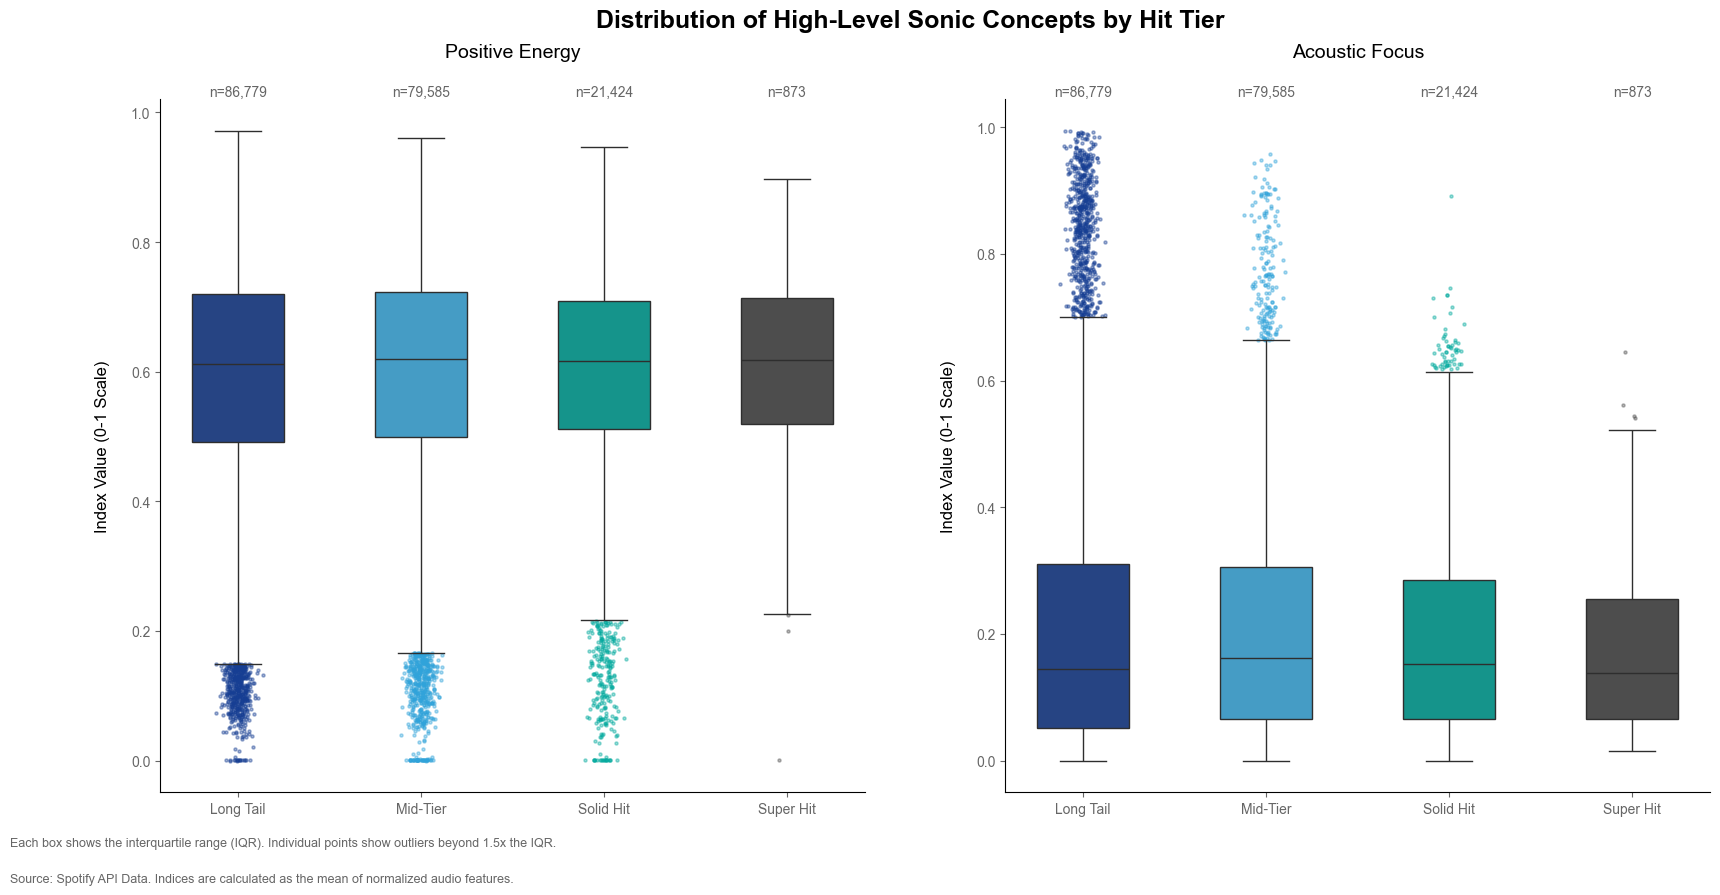

In [ ]:
# Cell 20b: Integral Audio Indices Analysis

# A helper function to calculate and plot only the outliers for a boxplot.
def plot_outliers(ax, df, x_col, y_col, order, palette):
    color_map = dict(zip(order, palette))
    for i, category in enumerate(order):
        category_data = df[df[x_col] == category][y_col]

        q1, q3 = category_data.quantile(0.25), category_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        outliers = category_data[(category_data < lower_bound) | (category_data > upper_bound)]

        if not outliers.empty:
            jittered_x = np.random.normal(i, 0.04, size=len(outliers))
            ax.scatter(jittered_x, outliers, color=color_map[category], s=5, alpha=0.4)

# Creates polished hybrid plots showing boxplots and their outliers.
def plot_integral_indices(df, config):
    indices = [col for col in df.columns if col.startswith('index_')]
    if not indices:
        print("⚠️ No integral indices found.")
        return

    fig, axes = plt.subplots(1, len(indices), figsize=(10 * len(indices), 9), gridspec_kw={'wspace': 0.2})
    if len(indices) == 1: axes = [axes]

    fig.suptitle("Distribution of High-Level Sonic Concepts by Hit Tier", fontsize=config['fonts']['title'] + 2, fontweight='bold', y=0.98)

    tier_labels = config['hit_tier_config']['labels']
    sample_sizes = df['hit_tier'].value_counts()
    colors = setup_chart_colors("categorical", n_colors=len(tier_labels))

    for i, index_name in enumerate(indices):
        ax = axes[i]

        sns.boxplot(data=df, x='hit_tier', y=index_name, ax=ax,
                    order=tier_labels, palette=colors, hue='hit_tier',
                    legend=False, width=0.5, showfliers=False)

        plot_outliers(ax, df, 'hit_tier', index_name, tier_labels, colors)

        apply_mckinsey_style(ax)

        clean_title = index_name.replace('index_', '').replace('_', ' ').title()
        ax.set_title(clean_title, fontsize=config['fonts']['subtitle'], pad=30)
        ax.set_xlabel("")
        ax.set_ylabel("Index Value (0-1 Scale)", labelpad=15)

        for xtick in ax.get_xticks():
            ax.text(xtick, ax.get_ylim()[1], f"n={sample_sizes[tier_labels[xtick]]:,}",
                    ha='center', va='bottom', fontsize=config['fonts']['tick'], color=config['colors']['text_gray'])

    interpretation_text = ("Each box shows the interquartile range (IQR). "
                           "Individual points show outliers beyond 1.5x the IQR.")
    source_text = "Source: Spotify API Data. Indices are calculated as the mean of normalized audio features."

    fig.text(0.05, 0.05, interpretation_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'], ha='left', wrap=True)
    fig.text(0.05, 0.01, source_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'], ha='left', wrap=True)

    plt.tight_layout(rect=[0, 0.08, 1, 0.95])
    plt.show()

# --- Execute Visualization ---
plot_integral_indices(df_master, CONFIG)

### The "Star Power" Factor: Analyzing Artist Strength

Beyond the sonic qualities of a track, how much does the artist's existing popularity matter? In this section, we analyze four key metrics of "artist strength" to see if there's a correlation between an artist's profile and the success of their songs.

We will visualize the average value of each metric for the different `hit_tier` categories to identify trends.

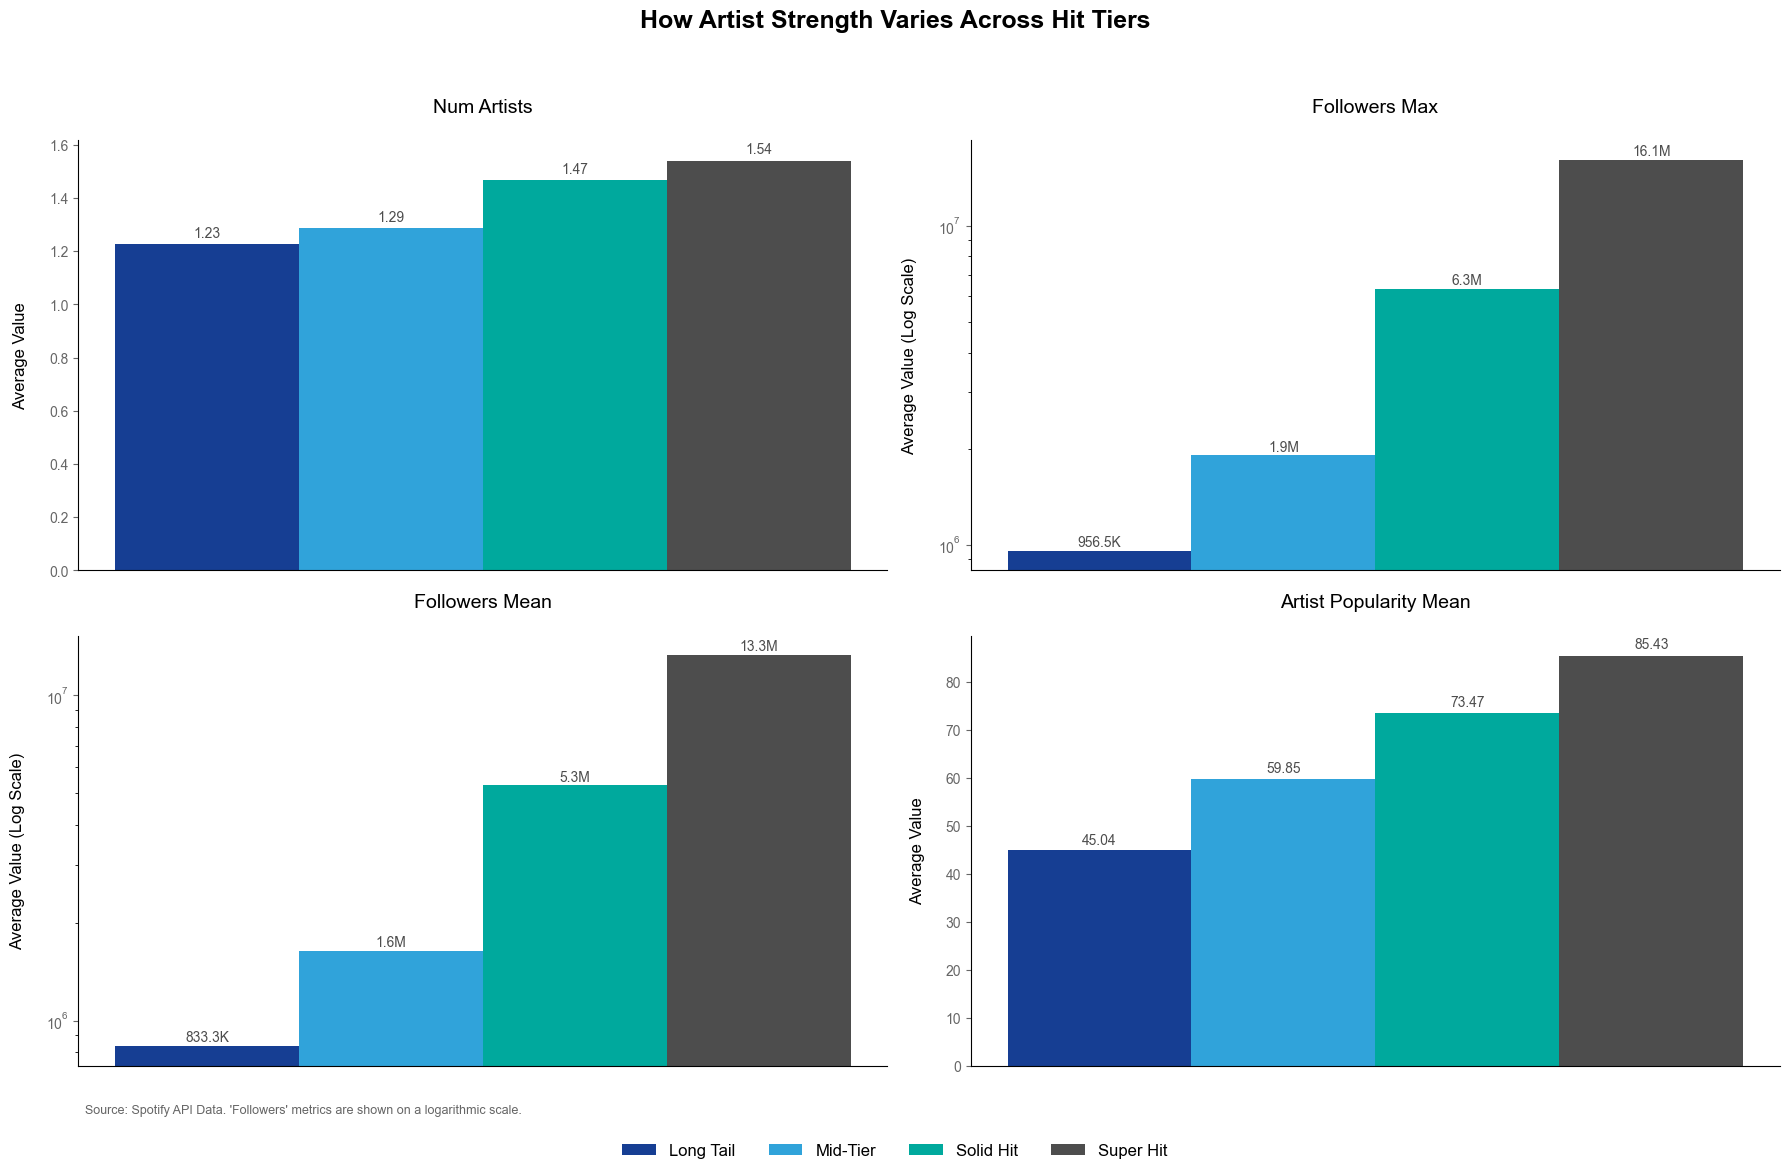

In [ ]:
# Cell 21b: Artist Strength Analysis

# A helper function to format large numbers into K (thousands) or M (millions).
def format_large_number(num):
    if num >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    if num >= 1_000:
        return f'{num / 1_000:.1f}K'
    return f'{num:.2f}'

# Creates a 2x2 grid of grouped bar plots.
def plot_artist_metrics_grid(df, config):
    # 1. Prepare data
    tier_labels = config['hit_tier_config']['labels']
    df['hit_tier'] = pd.Categorical(df['hit_tier'], categories=tier_labels, ordered=True)
    metrics_df = df.groupby('hit_tier', observed=True)[config['artist_features']].mean()

    # 2. Setup figure
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    axes = axes.flatten()
    fig.suptitle("How Artist Strength Varies Across Hit Tiers", fontsize=config['fonts']['title'] + 2, fontweight='bold', y=0.98)

    colors = setup_chart_colors("categorical", n_colors=len(tier_labels))
    color_map = dict(zip(tier_labels, colors))

    # 3. Create a bar plot for each metric
    for i, feature in enumerate(metrics_df.columns):
        ax = axes[i]
        apply_mckinsey_style(ax)

        # Manual grouped bar plot logic
        n_tiers = len(tier_labels)
        bar_width = 0.18
        index = np.arange(1)

        for j, tier in enumerate(tier_labels):
            position = index - (bar_width * n_tiers / 2) + (j * bar_width) + bar_width/2
            value = metrics_df.loc[tier, feature]
            ax.bar(position, value, bar_width, label=tier, color=color_map[tier])

            label = format_large_number(value)
            y_offset = ax.get_ylim()[1] * 0.01
            ax.text(position, value + y_offset, label, ha='center', va='bottom',
                    fontsize=config['fonts']['tick'], color=config['colors']['dark_gray'])

        # 4. Styling and Labels
        clean_title = feature.replace('_', ' ').title()
        ax.set_title(clean_title, fontsize=config['fonts']['subtitle'], pad=20)
        ax.set_ylabel("Average Value")
        ax.set_xticks([])
        ax.set_xlabel("")

        if 'followers' in feature:
            ax.set_yscale('log')
            ax.set_ylabel("Average Value (Log Scale)")

    # 5. Final Touches
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.01), ncol=n_tiers, frameon=False)

    source_text = "Source: Spotify API Data. 'Followers' metrics are shown on a logarithmic scale."
    fig.text(0.05, 0.06, source_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'], ha='left')

    plt.tight_layout(rect=[0, 0.08, 1, 0.95])
    plt.show()

# --- Execute Analysis ---
plot_artist_metrics_grid(df_master, CONFIG)

### Solo vs. Collaboration: A Numbers Game?

The music industry is filled with high-profile collaborations. But does teaming up with another artist actually lead to greater success?

To answer this, we will compare the **distribution of hit tiers** for solo tracks versus collaborations. This will show us not just if collaborations are more popular on average, but whether they have a proportionally higher chance of becoming a 'Solid' or 'Super' hit.

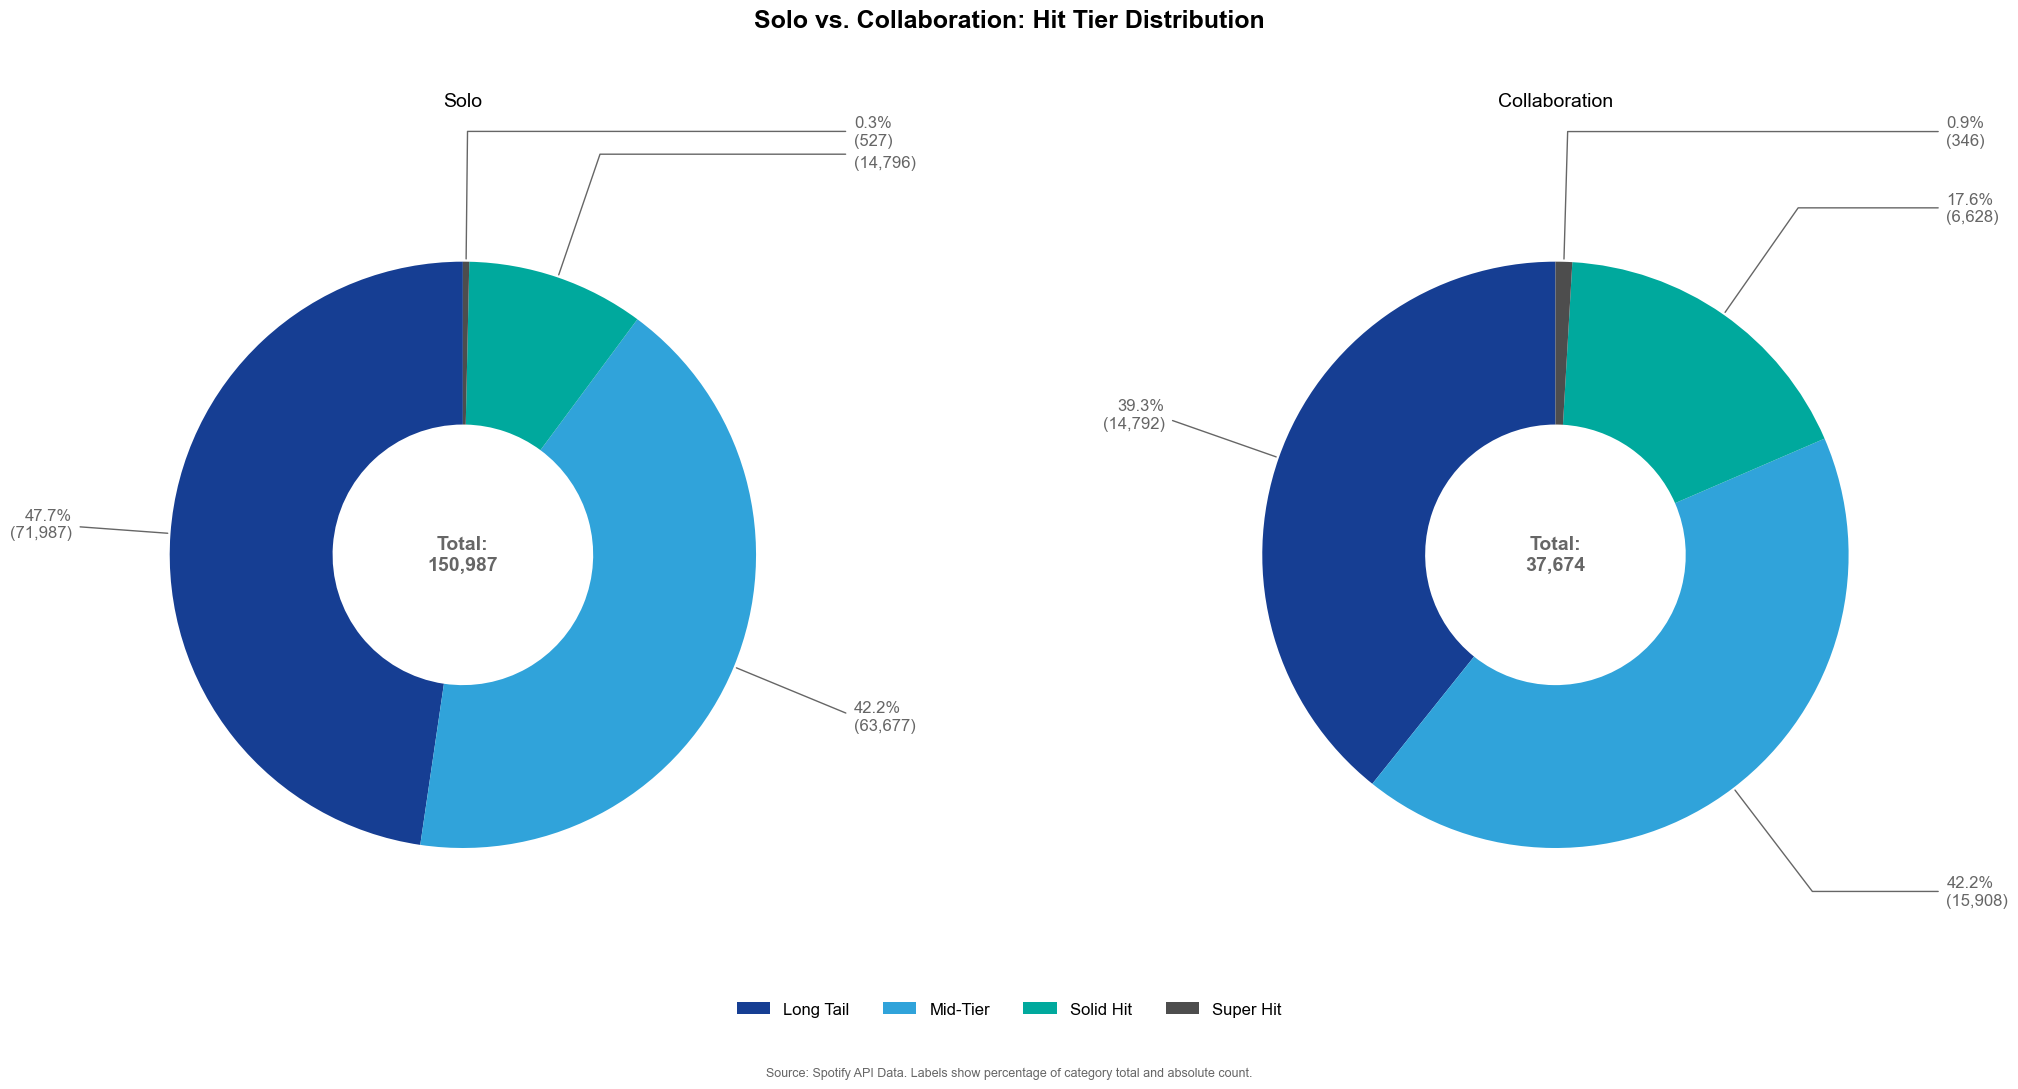

In [ ]:
# Cell 22b: Solo vs Collaboration Success Analysis

# Creates advanced donut charts to compare hit tier distribution.
def plot_collaboration_distribution(df, config):
    # 1. Prepare data
    summary = pd.crosstab(df['is_collaboration'], df['hit_tier'])
    summary.index = ['Solo', 'Collaboration']

    # 2. Setup figure
    fig, axes = plt.subplots(1, 2, figsize=(22, 11))
    fig.suptitle('Solo vs. Collaboration: Hit Tier Distribution', y=0.98,
                 fontsize=config['fonts']["title"] + 2, fontweight='bold')

    colors = setup_chart_colors("categorical", n_colors=len(summary.columns))

    # 3. Create a donut chart for each category
    for i, chart_type in enumerate(['Solo', 'Collaboration']):
        ax = axes[i]
        data = summary.loc[chart_type]

        wedges, _ = ax.pie(data, startangle=90, radius=0.9, colors=colors,
                           wedgeprops=dict(width=0.5))

        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-", color=config['colors']['text_gray']),
                  bbox=bbox_props, zorder=0, va="center")

        for j, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))

            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})

            label_text = f"{data.iloc[j]/data.sum()*100:.1f}%\n({data.iloc[j]:,})"
            ax.annotate(label_text, xy=(x*0.9, y*0.9), xytext=(1.2*np.sign(x), 1.3*y),
                        horizontalalignment=horizontalalignment,
                        fontsize=config['fonts']['label'],
                        color=config['colors']['text_gray'], **kw)

        ax.text(0, 0, f'Total:\n{data.sum():,}', ha='center', va='center',
                fontsize=config['fonts']["subtitle"], fontweight='bold',
                color=config['colors']["text_gray"])

        ax.set_title(chart_type, fontsize=config['fonts']["subtitle"], pad=30)

    # 4. Final Touches
    legend_labels = summary.columns.tolist()
    fig.legend(handles=wedges, labels=legend_labels,
               loc='lower center', bbox_to_anchor=(0.5, 0.05),
               ncol=len(legend_labels), frameon=False,
               fontsize=config['fonts']['label'])

    source_text = "Source: Spotify API Data. Labels show percentage of category total and absolute count."
    fig.text(0.5, 0.01, source_text, ha='center', fontsize=config['fonts']['source'], color=config['colors']['text_gray'])

    plt.tight_layout(rect=[0, 0.1, 1, 0.92])
    plt.show()

# --- Execute Analysis ---
plot_collaboration_distribution(df_master, CONFIG)

### Genre's Role in Chart Success

The dataset contains thousands of highly specific "micro-genres". To perform a meaningful analysis, we first need to group these into broader, more recognizable categories like Pop, Hip Hop, and Rock.

This allows us to answer a key question for any record label: **Which high-level genres are most strongly associated with top-tier hits?** We will focus our analysis on the combined "Solid Hit" and "Super Hit" tiers to get a robust view of what constitutes a successful track.

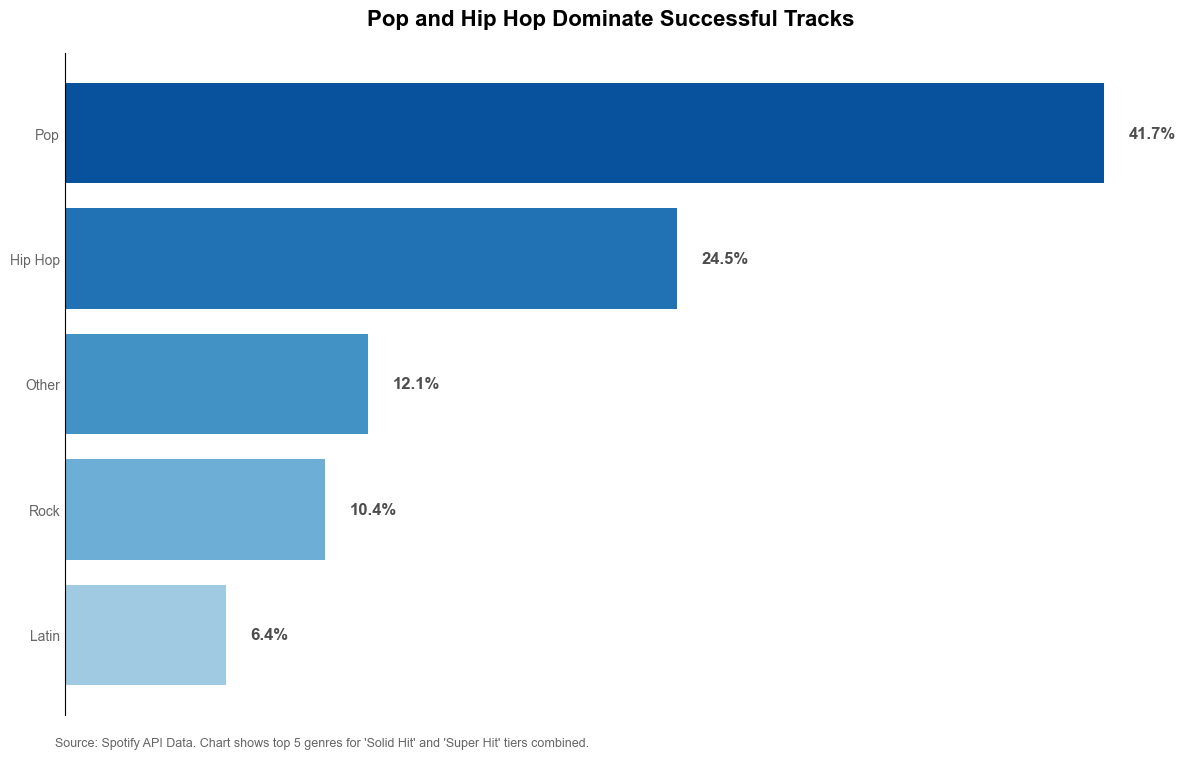

In [ ]:
# Cell 23b: Genre Analysis

# Defines genre mapping and creates a visualization of top genres for successful tracks.
def analyze_and_plot_top_genres(df, config):
    # --- 1. Define Genre Mapping ---
    # This mapping is internal to the function as it's specific to this analysis
    GENRE_MAP = {
        'Pop': ['pop', 'singer-songwriter', 'indie'],
        'Hip Hop': ['hip hop', 'rap', 'trap', 'r&b'],
        'Rock': ['rock', 'permanent wave', 'alternative'],
        'Electronic': ['electro', 'house', 'techno', 'edm', 'dance'],
        'Latin': ['latin', 'reggaeton', 'latino'],
        'Folk/Acoustic': ['folk', 'acoustic']
    }

    def assign_genre_group(genre_list):
        for genre in genre_list:
            for major_genre, sub_genres in GENRE_MAP.items():
                if any(sub in genre for sub in sub_genres):
                    return major_genre
        return 'Other'

    # --- 2. Apply Mapping and Analyze ---
    df['genre_group'] = df['all_genres'].apply(assign_genre_group)

    successful_tiers = ['Solid Hit', 'Super Hit']
    successful_tracks_df = df[df['hit_tier'].isin(successful_tiers)]
    genre_dist = successful_tracks_df['genre_group'].value_counts(normalize=True).nlargest(5) * 100

    # --- 3. Visualization ---
    fig, ax = plt.subplots(figsize=(12, 8))
    apply_mckinsey_style(ax)

    colors = sns.color_palette("Blues_r", n_colors=len(genre_dist) + 2)
    bars = ax.barh(genre_dist.index, genre_dist.values, color=colors)

    # --- 4. Styling and Labels ---
    ax.set_title("Pop and Hip Hop Dominate Successful Tracks", fontsize=config['fonts']['title'], fontweight='bold', pad=20)
    ax.invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', va='center', ha='left',
                fontsize=config['fonts']['label'],
                color=config['colors']['dark_gray'],
                fontweight='bold')

    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.tick_params(axis='y', length=0)

    source_text = "Source: Spotify API Data. Chart shows top 5 genres for 'Solid Hit' and 'Super Hit' tiers combined."
    fig.text(0.05, 0.01, source_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Execute Analysis ---
analyze_and_plot_top_genres(df_master, CONFIG)

### Release Timing Strategy

Finally, we investigate if the timing of a release correlates with its success. We will explore this from two angles:

1.  **Macro-level (Seasonal):** Is there a "hit season"? We'll look at the proportional distribution of hit tiers across the four seasons.
2.  **Micro-level (Weekly):** Is there a "hit day"? We'll visualize the success rate (% of hits) for each day of the week and month to identify any "hotspots" for releasing a successful track.

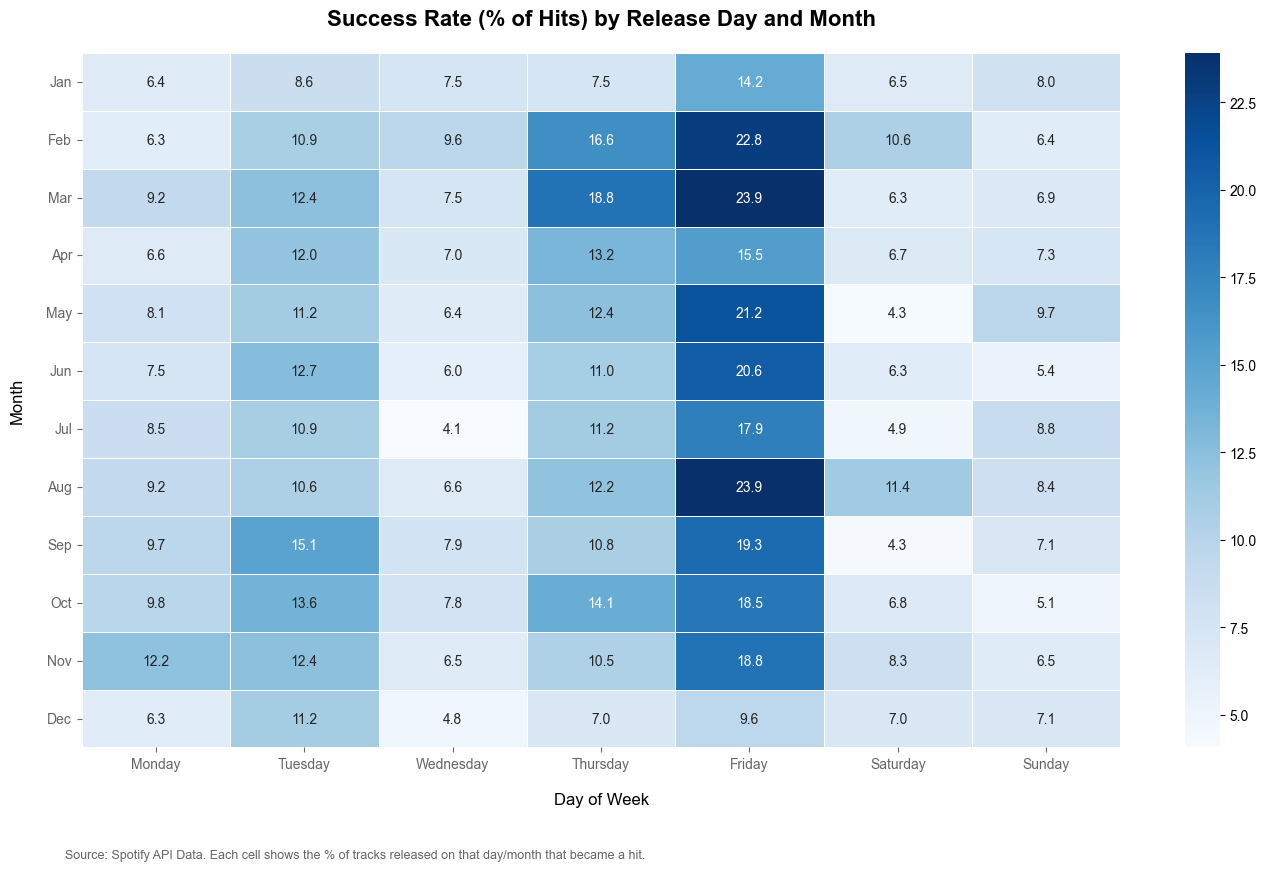

In [ ]:
# Cell 24b: Heatmap of Hit Success Rate

import calendar

# Creates a heatmap to analyze the success rate of releases by month and day.
def plot_hit_release_heatmap(df, config):
    df_copy = df.copy()
    df_copy['release_day_of_week'] = df_copy['release_date'].dt.day_name()

    successful_tiers = ['Solid Hit', 'Super Hit']
    successful_tracks_df = df_copy[df_copy['hit_tier'].isin(successful_tiers)]

    total_releases = pd.crosstab(df_copy['release_month'], df_copy['release_day_of_week'])
    successful_releases = pd.crosstab(successful_tracks_df['release_month'],
                                      successful_tracks_df['release_day_of_week'])

    success_rate = successful_releases.div(total_releases).fillna(0) * 100

    days_order = list(calendar.day_name)
    months_order = list(range(1, 13))
    success_rate = success_rate.reindex(index=months_order, columns=days_order).fillna(0)

    fig, ax = plt.subplots(figsize=(14, 9))
    sns.heatmap(success_rate, ax=ax, cmap='Blues', linewidths=.5, annot=True, fmt=".1f")

    apply_mckinsey_style(ax, remove_spines=False)

    ax.set_title("Success Rate (% of Hits) by Release Day and Month", fontsize=config['fonts']['title'], fontweight='bold', pad=20)
    ax.set_xlabel("Day of Week")
    ax.set_ylabel("Month")
    ax.set_yticklabels([calendar.month_abbr[i] for i in months_order], rotation=0)

    source_text = "Source: Spotify API Data. Each cell shows the % of tracks released on that day/month that became a hit."
    fig.text(0.05, -0.01, source_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'], ha='left')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Execute Analysis ---
plot_hit_release_heatmap(df_master, CONFIG)

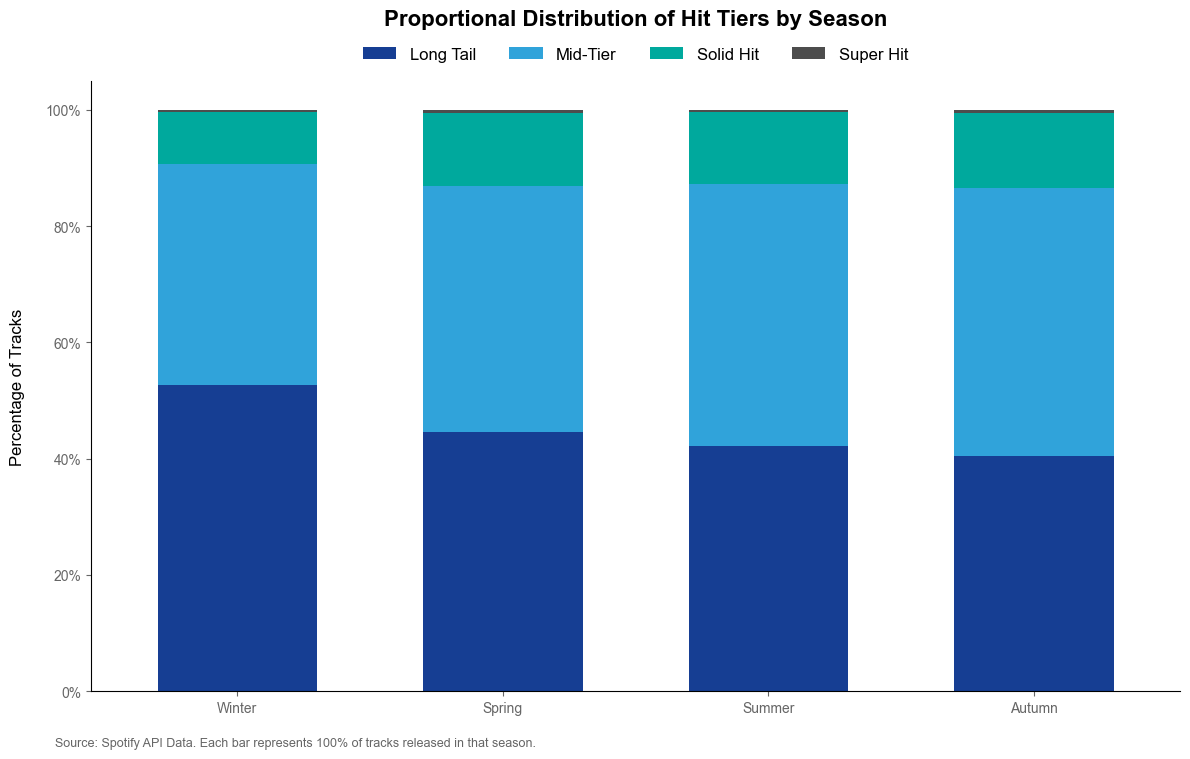

In [ ]:
# Cell 24c: Seasonal Distribution of Hit Tiers

import matplotlib.ticker as mtick

# Creates a stacked bar chart to analyze the seasonal distribution of hit tiers.
def plot_seasonal_distribution(df, config):
    seasonal_data = pd.crosstab(df['season'], df['hit_tier'], normalize='index') * 100
    seasons_order = ['Winter', 'Spring', 'Summer', 'Autumn']
    seasonal_data = seasonal_data.reindex(index=seasons_order)

    fig, ax = plt.subplots(figsize=(12, 8))
    colors = setup_chart_colors("categorical", n_colors=len(df['hit_tier'].cat.categories))

    seasonal_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.6)

    apply_mckinsey_style(ax)

    ax.set_title("Proportional Distribution of Hit Tiers by Season", fontsize=config['fonts']['title'], fontweight='bold', pad=40)
    ax.set_xlabel("")
    ax.set_ylabel("Percentage of Tracks")
    ax.tick_params(axis='x', rotation=0)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, 1.08),
              ncol=len(seasonal_data.columns), frameon=False)

    source_text = "Source: Spotify API Data. Each bar represents 100% of tracks released in that season."
    fig.text(0.05, 0.01, source_text, fontsize=config['fonts']['source'], color=config['colors']['text_gray'])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Execute Analysis ---
plot_seasonal_distribution(df_master, CONFIG)

# Final Insights & Project Summary

---

### Key Findings: The Anatomy of a Modern Hit

Our analysis of over 170,000 tracks released since 2000 has revealed a clear, data-driven profile of what makes a song successful on Spotify.

*   **Sonic Profile:** Hits are not random; they have a measurable "sonic fingerprint." They are consistently **louder, more danceable, and less instrumental** than average tracks. This suggests that production quality and arrangement catering to active listening are key.

*   **Artist Brand:** An artist's existing strength—measured by followers and popularity—is a powerful predictor of success. This confirms the industry wisdom that a strong existing fanbase is critical for launching a hit.

*   **The Power of Collaboration:** While less common, collaborations consistently show a higher proportion of "Solid" and "Super" hits. Strategic partnerships are a proven method for amplifying a track's reach and success.

*   **Genre Dominance:** The path to the top is not equal for all genres. **Pop and Hip Hop** are the undisputed leaders in producing top-tier hits, reflecting current mainstream listener demand.

*   **Strategic Timing:** Success is not just about what you release, but *when*. Our analysis shows a higher success rate for tracks released on **Fridays**, particularly in the **Autumn months**, suggesting a clear industry pattern for maximizing release impact.

### Limitations & Context

To ensure accurate interpretation, it's crucial to acknowledge the scope of this analysis.

1.  **Correlation vs. Causation:** We have identified strong correlations, but this does not prove causation. A loud, danceable track is not guaranteed success.
2.  **Missing External Factors:** Our analysis is limited to Spotify's API data. It does not include massive real-world drivers like **marketing spend, playlisting strategy, and social media virality (e.g., TikTok)**.
3.  **Genre Simplification:** Our genre mapping is a necessary simplification. The true landscape is far more nuanced.

### Next Steps & Future Research

This analysis serves as a strong foundation for more advanced inquiries:

*   **Predictive Modeling:** Quantify the importance of each feature by building a model to predict a track's `hit_tier`.
*   **Temporal Analysis:** Investigate how the "hit formula" has evolved *within* the post-2000s era.
*   **Deeper Feature Analysis:** Explore NLP on track titles or more complex audio feature interactions.

**For a more detailed business-oriented summary of this project, please refer to the `README.md` file in the GitHub repository.**